# (a)Draw the efficient frontier

5 Stocks - Stock codes: [   5  700 1024 2628 6618]
5 Stocks - Covariance matrix shape: (5, 5)
5 Stocks - Covariance matrix:
[[0.05963 0.03505 0.04799 0.04848 0.05335]
 [0.03505 0.11412 0.13792 0.1178  0.10885]
 [0.04799 0.13792 0.3511  0.18025 0.1956 ]
 [0.04848 0.1178  0.18025 0.25465 0.18226]
 [0.05335 0.10885 0.1956  0.18226 0.31175]]

6 Stocks - Stock codes: [   5  700 1024 2628 6618 1044]
6 Stocks - Covariance matrix shape: (6, 6)
6 Stocks - Covariance matrix:
[[0.05963 0.03505 0.04799 0.04848 0.05335 0.01948]
 [0.03505 0.11412 0.13792 0.1178  0.10885 0.05051]
 [0.04799 0.13792 0.3511  0.18025 0.1956  0.07527]
 [0.04848 0.1178  0.18025 0.25465 0.18226 0.09211]
 [0.05335 0.10885 0.1956  0.18226 0.31175 0.08893]
 [0.01948 0.05051 0.07527 0.09211 0.08893 0.07155]]


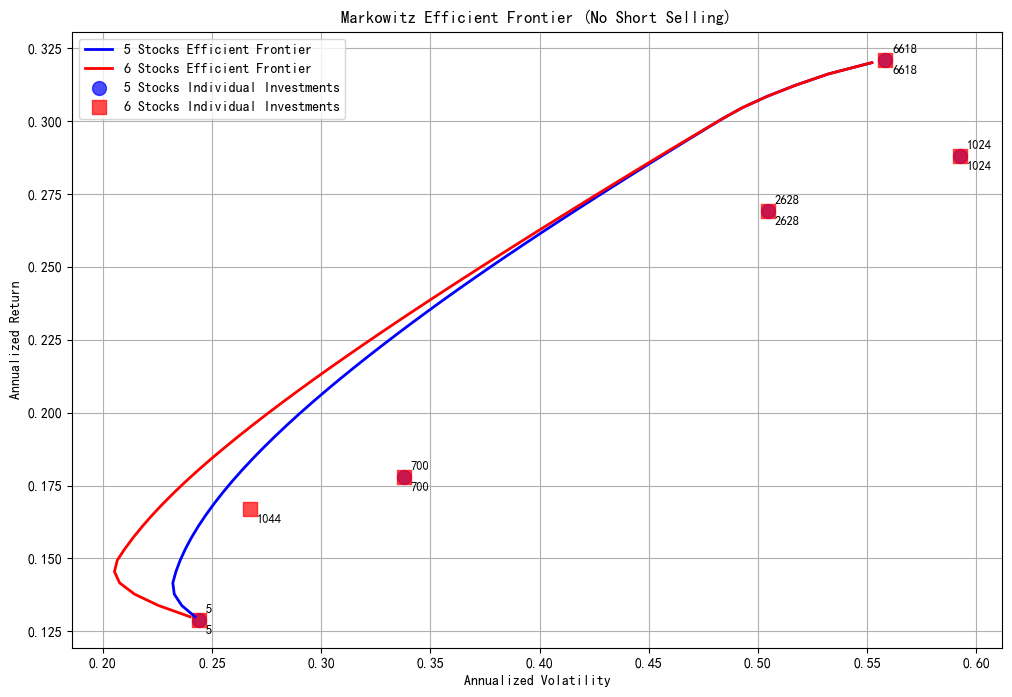

\n5 Stocks Portfolio Results:
Minimum Variance Portfolio:
  Return: 0.1416 (14.16%)
  Volatility: 0.2320 (23.20%)
  Weights: [7.42190730e-01 2.57809270e-01 2.77555756e-16 0.00000000e+00
 5.55111512e-17]
  Stock codes: [   5  700 1024 2628 6618]
\nMaximum Sharpe Ratio Portfolio:
  Return: 0.2114 (21.14%)
  Volatility: 0.3084 (30.84%)
  Weights: [0.46646226 0.07484234 0.08366309 0.12591036 0.24912195]
  Stock codes: [   5  700 1024 2628 6618]
\n6 Stocks Portfolio Results:
Minimum Variance Portfolio:
  Return: 0.1455 (14.55%)
  Volatility: 0.2053 (20.53%)
  Weights: [5.66317298e-01 2.75103787e-03 0.00000000e+00 2.15756232e-17
 9.54097912e-18 4.30931664e-01]
  Stock codes: [   5  700 1024 2628 6618 1044]
\nMaximum Sharpe Ratio Portfolio:
  Return: 0.1843 (18.43%)
  Volatility: 0.2498 (24.98%)
  Weights: [3.60738819e-01 1.93805399e-03 7.33374845e-02 1.01643954e-19
 1.43497631e-01 4.20488011e-01]
  Stock codes: [   5  700 1024 2628 6618 1044]
\n5 Stocks Sharpe Ratios:
  Minimum Variance Port

In [ ]:
# Improved Portfolio Optimization Code
# Using both 5 and 6 stocks data and reading covariance matrix from CSV file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set Chinese font for plots
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Expected annual returns for 5 stocks (%)
expected_returns_5 = np.array([12.9, 17.8, 28.8, 26.9, 32.1]) / 100

# Expected annual returns for 6 stocks (%)
expected_returns_6 = np.array([12.9, 17.8, 28.8, 26.9, 32.1, 16.7]) / 100

# Read covariance matrix from CSV file
def read_covariance_matrix(csv_file):
    """
    Read covariance matrix from CSV file
    First row contains stock codes, remaining rows contain covariance values
    """
    df = pd.read_csv(csv_file, header=None)
    
    # Get stock codes from first row
    stock_codes = df.iloc[0].values.astype(int)
    
    # Get covariance matrix (skip first row)
    cov_data = df.iloc[1:].values.astype(float)
    
    # Remove last row if it's empty
    if np.isnan(cov_data[-1]).all():
        cov_data = cov_data[:-1]
    
    return cov_data, stock_codes

# Read covariance matrix
cov_matrix_full, stock_codes = read_covariance_matrix('Annualized covariance between stocks.csv')

# Extract 5 stocks covariance matrix (first 5x5)
cov_matrix_5 = cov_matrix_full[:5, :5]
stock_codes_5 = stock_codes[:5]

# Use full 6 stocks covariance matrix
cov_matrix_6 = cov_matrix_full
stock_codes_6 = stock_codes

print("5 Stocks - Stock codes:", stock_codes_5)
print("5 Stocks - Covariance matrix shape:", cov_matrix_5.shape)
print("5 Stocks - Covariance matrix:")
print(cov_matrix_5)
print()

print("6 Stocks - Stock codes:", stock_codes_6)
print("6 Stocks - Covariance matrix shape:", cov_matrix_6.shape)
print("6 Stocks - Covariance matrix:")
print(cov_matrix_6)

# Portfolio optimization functions
def portfolio_variance(weights, cov_matrix):
    """Calculate portfolio variance"""
    return weights.T @ cov_matrix @ weights

def optimize_portfolio(target_return, expected_returns, cov_matrix):
    """
    Optimize portfolio for given target return
    Constraints: weights sum to 1, no short selling allowed
    """
    n_assets = len(expected_returns)
    
    # Constraints: weights sum to 1, expected return equals target return
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, expected_returns) - target_return}
    ]
    
    # Bounds: weights non-negative (no short selling)
    bounds = tuple((0, 1) for _ in range(n_assets))
    
    # Initial guess: equal weights
    init_guess = np.ones(n_assets) / n_assets
    
    # Optimization: minimize variance
    result = minimize(
        portfolio_variance, 
        init_guess, 
        args=(cov_matrix,), 
        method='SLSQP', 
        bounds=bounds, 
        constraints=constraints
    )
    
    return result

def calculate_efficient_frontier(expected_returns, cov_matrix, return_range):
    """Calculate efficient frontier for given return range"""
    frontier_returns = []
    frontier_volatilities = []
    frontier_weights = []
    
    for target_return in return_range:
        result = optimize_portfolio(target_return, expected_returns, cov_matrix)
        
        if result.success:
            frontier_returns.append(target_return)
            frontier_volatilities.append(np.sqrt(result.fun))
            frontier_weights.append(result.x)
    
    return frontier_returns, frontier_volatilities, frontier_weights

# Set target return range (13% to 32%)
return_range = np.linspace(0.13, 0.32, 50)

# Calculate efficient frontier for 5 stocks
frontier_returns_5, frontier_volatilities_5, frontier_weights_5 = calculate_efficient_frontier(
    expected_returns_5, cov_matrix_5, return_range
)

# Calculate efficient frontier for 6 stocks
frontier_returns_6, frontier_volatilities_6, frontier_weights_6 = calculate_efficient_frontier(
    expected_returns_6, cov_matrix_6, return_range
)

# Plot efficient frontier for 5 stocks
plt.figure(figsize=(12, 8))
plt.plot(frontier_volatilities_5, frontier_returns_5, 'b-', linewidth=2, label='5 Stocks Efficient Frontier')

# Mark individual stock investment points for 5 stocks
stock_volatilities_5 = np.sqrt(np.diag(cov_matrix_5))
plt.scatter(stock_volatilities_5, expected_returns_5, marker='o', s=100, c='blue', label='Individual Stock Investments', alpha=0.7)

# Add stock code labels for 5 stocks
for i, code in enumerate(stock_codes_5):
    plt.annotate(f'{code}', (stock_volatilities_5[i], expected_returns_5[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('5 Stocks - Markowitz Efficient Frontier (No Short Selling)')
plt.legend()
plt.grid(True)
plt.show()

# Plot efficient frontier for 6 stocks
plt.figure(figsize=(12, 8))
plt.plot(frontier_volatilities_6, frontier_returns_6, 'r-', linewidth=2, label='6 Stocks Efficient Frontier')

# Mark individual stock investment points for 6 stocks
stock_volatilities_6 = np.sqrt(np.diag(cov_matrix_6))
plt.scatter(stock_volatilities_6, expected_returns_6, marker='s', s=100, c='red', label='Individual Stock Investments', alpha=0.7)

# Add stock code labels for 6 stocks
for i, code in enumerate(stock_codes_6):
    plt.annotate(f'{code}', (stock_volatilities_6[i], expected_returns_6[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('6 Stocks - Markowitz Efficient Frontier (No Short Selling)')
plt.legend()
plt.grid(True)
plt.show()

# Find minimum variance and maximum Sharpe ratio portfolios
def find_min_variance_portfolio(frontier_returns, frontier_volatilities, frontier_weights):
    """Find minimum variance portfolio"""
    min_var_idx = np.argmin(frontier_volatilities)
    return frontier_returns[min_var_idx], frontier_volatilities[min_var_idx], frontier_weights[min_var_idx]

def find_max_sharpe_portfolio(frontier_returns, frontier_volatilities, frontier_weights, rf_rate=0.0235):
    """Find maximum Sharpe ratio portfolio"""
    sharpe_ratios = [(r - rf_rate) / v for r, v in zip(frontier_returns, frontier_volatilities)]
    max_sharpe_idx = np.argmax(sharpe_ratios)
    return frontier_returns[max_sharpe_idx], frontier_volatilities[max_sharpe_idx], frontier_weights[max_sharpe_idx]

# Calculate optimal portfolios for 5 stocks
min_var_return_5, min_var_vol_5, min_var_weights_5 = find_min_variance_portfolio(
    frontier_returns_5, frontier_volatilities_5, frontier_weights_5
)

max_sharpe_return_5, max_sharpe_vol_5, max_sharpe_weights_5 = find_max_sharpe_portfolio(
    frontier_returns_5, frontier_volatilities_5, frontier_weights_5
)

# Calculate optimal portfolios for 6 stocks
min_var_return_6, min_var_vol_6, min_var_weights_6 = find_min_variance_portfolio(
    frontier_returns_6, frontier_volatilities_6, frontier_weights_6
)

max_sharpe_return_6, max_sharpe_vol_6, max_sharpe_weights_6 = find_max_sharpe_portfolio(
    frontier_returns_6, frontier_volatilities_6, frontier_weights_6
)

# Print results for 5 stocks
print("\\n5 Stocks Portfolio Results:")
print("=" * 50)
print(f"Minimum Variance Portfolio:")
print(f"  Return: {min_var_return_5:.4f} ({min_var_return_5*100:.2f}%)")
print(f"  Volatility: {min_var_vol_5:.4f} ({min_var_vol_5*100:.2f}%)")
print(f"  Weights: {min_var_weights_5}")
print(f"  Stock codes: {stock_codes_5}")

print(f"\\nMaximum Sharpe Ratio Portfolio:")
print(f"  Return: {max_sharpe_return_5:.4f} ({max_sharpe_return_5*100:.2f}%)")
print(f"  Volatility: {max_sharpe_vol_5:.4f} ({max_sharpe_vol_5*100:.2f}%)")
print(f"  Weights: {max_sharpe_weights_5}")
print(f"  Stock codes: {stock_codes_5}")

# Print results for 6 stocks
print("\\n6 Stocks Portfolio Results:")
print("=" * 50)
print(f"Minimum Variance Portfolio:")
print(f"  Return: {min_var_return_6:.4f} ({min_var_return_6*100:.2f}%)")
print(f"  Volatility: {min_var_vol_6:.4f} ({min_var_vol_6*100:.2f}%)")
print(f"  Weights: {min_var_weights_6}")
print(f"  Stock codes: {stock_codes_6}")

print(f"\\nMaximum Sharpe Ratio Portfolio:")
print(f"  Return: {max_sharpe_return_6:.4f} ({max_sharpe_return_6*100:.2f}%)")
print(f"  Volatility: {max_sharpe_vol_6:.4f} ({max_sharpe_vol_6*100:.2f}%)")
print(f"  Weights: {max_sharpe_weights_6}")
print(f"  Stock codes: {stock_codes_6}")

# Calculate Sharpe ratios for 5 stocks
min_var_sharpe_5 = (min_var_return_5 - 0.0235) / min_var_vol_5
max_sharpe_ratio_5 = (max_sharpe_return_5 - 0.0235) / max_sharpe_vol_5

# Calculate Sharpe ratios for 6 stocks
min_var_sharpe_6 = (min_var_return_6 - 0.0235) / min_var_vol_6
max_sharpe_ratio_6 = (max_sharpe_return_6 - 0.0235) / max_sharpe_vol_6

print(f"\\n5 Stocks Sharpe Ratios:")
print(f"  Minimum Variance Portfolio: {min_var_sharpe_5:.4f}")
print(f"  Maximum Sharpe Portfolio: {max_sharpe_ratio_5:.4f}")

print(f"\\n6 Stocks Sharpe Ratios:")
print(f"  Minimum Variance Portfolio: {min_var_sharpe_6:.4f}")
print(f"  Maximum Sharpe Portfolio: {max_sharpe_ratio_6:.4f}")

# Create summary table for 5 stocks
summary_data_5 = {
    'Stock Code': stock_codes_5,
    'Expected Return (%)': expected_returns_5 * 100,
    'Volatility (%)': stock_volatilities_5 * 100,
    'Min Var Weight (%)': min_var_weights_5 * 100,
    'Max Sharpe Weight (%)': max_sharpe_weights_5 * 100
}

summary_df_5 = pd.DataFrame(summary_data_5)
print("\\n5 Stocks Portfolio Summary:")
print(summary_df_5.round(2))

# Create summary table for 6 stocks
summary_data_6 = {
    'Stock Code': stock_codes_6,
    'Expected Return (%)': expected_returns_6 * 100,
    'Volatility (%)': stock_volatilities_6 * 100,
    'Min Var Weight (%)': min_var_weights_6 * 100,
    'Max Sharpe Weight (%)': max_sharpe_weights_6 * 100
}

summary_df_6 = pd.DataFrame(summary_data_6)
print("\\n6 Stocks Portfolio Summary:")
print(summary_df_6.round(2))


# (b) Finding the Optimal Portfolio

5 Stocks - Stock codes: [   5  700 1024 2628 6618]
5 Stocks - Covariance matrix shape: (5, 5)

6 Stocks - Stock codes: [   5  700 1024 2628 6618 1044]
6 Stocks - Covariance matrix shape: (6, 6)
\n5 Stocks Tangency Portfolio Results:
Return: 0.2130 (21.30%)
Volatility: 0.3110 (31.10%)
Sharpe Ratio: 0.6093
Weights: [0.46060211 0.06971163 0.08594229 0.12957284 0.25417113]
Stock codes: [   5  700 1024 2628 6618]
\n6 Stocks Tangency Portfolio Results:
Return: 0.1834 (18.34%)
Volatility: 0.2485 (24.85%)
Sharpe Ratio: 0.6436
Weights: [0.35974809 0.00540774 0.07079814 0.         0.13944571 0.42460032]
Stock codes: [   5  700 1024 2628 6618 1044]


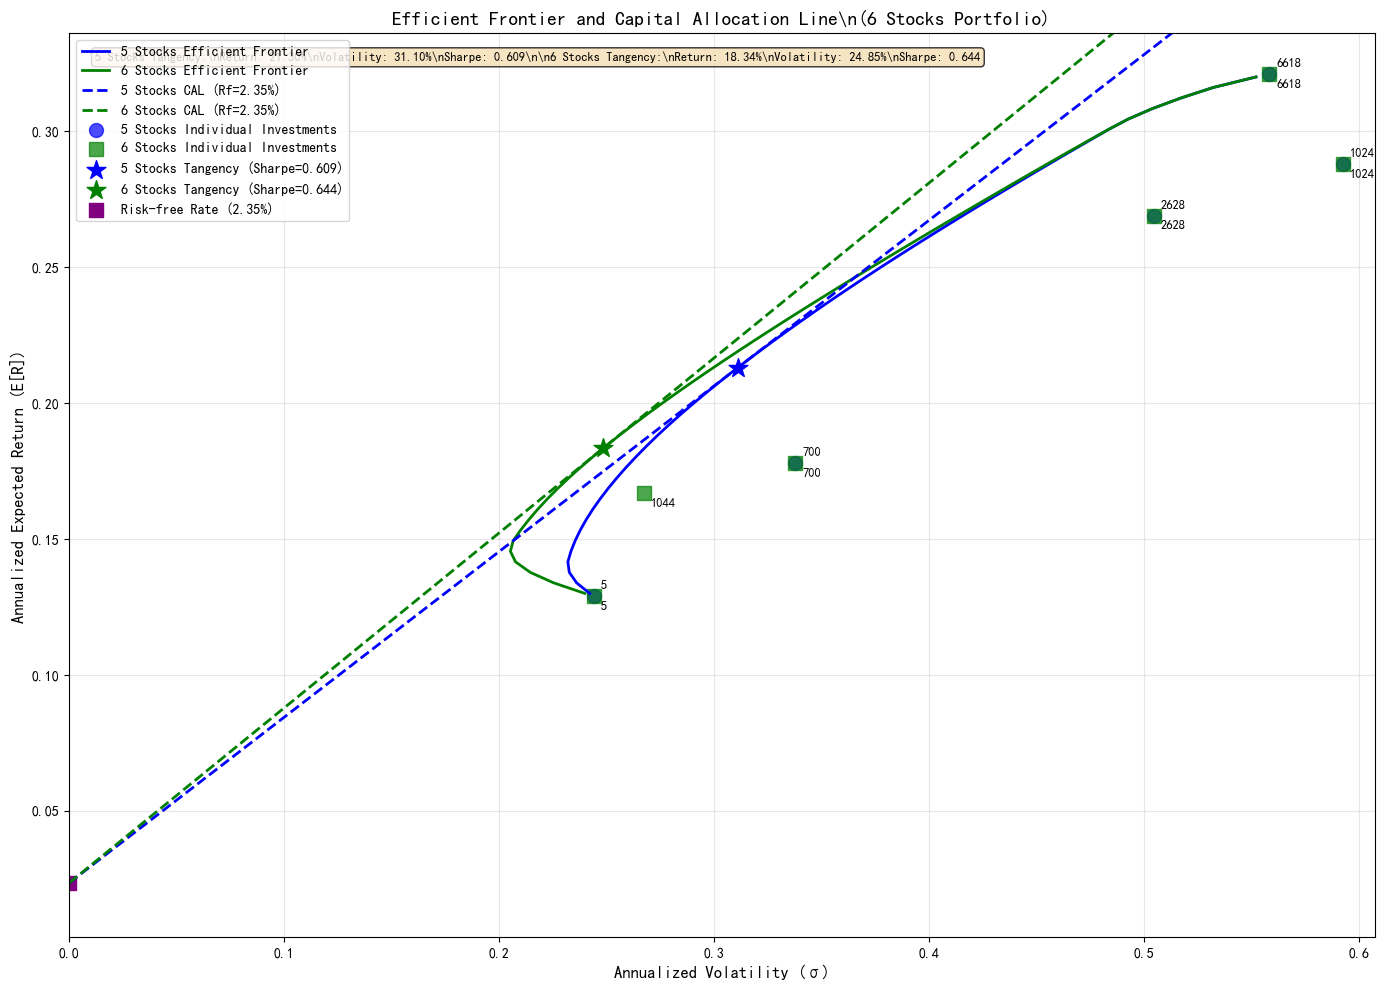

\n5 Stocks Detailed Portfolio Results:
   Stock Code  Expected Return (%)  Volatility (%)  Tangency Weight (%)
0           5                 12.9           24.42                46.06
1         700                 17.8           33.78                 6.97
2        1024                 28.8           59.25                 8.59
3        2628                 26.9           50.46                12.96
4        6618                 32.1           55.83                25.42
\n6 Stocks Detailed Portfolio Results:
   Stock Code  Expected Return (%)  Volatility (%)  Tangency Weight (%)
0           5                 12.9           24.42                35.97
1         700                 17.8           33.78                 0.54
2        1024                 28.8           59.25                 7.08
3        2628                 26.9           50.46                 0.00
4        6618                 32.1           55.83                13.94
5        1044                 16.7           26.75        

In [ ]:
# Efficient Frontier and Capital Allocation Line
# Using both 5 and 6 stocks data and reading covariance matrix from CSV file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set Chinese font for plots
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Expected annual returns for 5 stocks (%)
expected_returns_5 = np.array([12.9, 17.8, 28.8, 26.9, 32.1]) / 100

# Expected annual returns for 6 stocks (%)
expected_returns_6 = np.array([12.9, 17.8, 28.8, 26.9, 32.1, 16.7]) / 100

# Risk-free rate
rf_rate = 0.0235

# Read covariance matrix from CSV file
def read_covariance_matrix(csv_file):
    """
    Read covariance matrix from CSV file
    First row contains stock codes, remaining rows contain covariance values
    """
    df = pd.read_csv(csv_file, header=None)
    
    # Get stock codes from first row
    stock_codes = df.iloc[0].values.astype(int)
    
    # Get covariance matrix (skip first row)
    cov_data = df.iloc[1:].values.astype(float)
    
    # Remove last row if it's empty
    if np.isnan(cov_data[-1]).all():
        cov_data = cov_data[:-1]
    
    return cov_data, stock_codes

# Read covariance matrix
cov_matrix_full, stock_codes = read_covariance_matrix('Annualized covariance between stocks.csv')

# Extract 5 stocks covariance matrix (first 5x5)
cov_matrix_5 = cov_matrix_full[:5, :5]
stock_codes_5 = stock_codes[:5]

# Use full 6 stocks covariance matrix
cov_matrix_6 = cov_matrix_full
stock_codes_6 = stock_codes

print("5 Stocks - Stock codes:", stock_codes_5)
print("5 Stocks - Covariance matrix shape:", cov_matrix_5.shape)
print()
print("6 Stocks - Stock codes:", stock_codes_6)
print("6 Stocks - Covariance matrix shape:", cov_matrix_6.shape)

# Portfolio optimization functions
def portfolio_variance(weights, cov_matrix):
    """Calculate portfolio variance"""
    return weights.T @ cov_matrix @ weights

def portfolio_return(weights, expected_returns):
    """Calculate portfolio expected return"""
    return np.dot(weights, expected_returns)

def optimize_portfolio(target_return, expected_returns, cov_matrix):
    """
    Optimize portfolio for given target return
    Constraints: weights sum to 1, no short selling allowed
    """
    n_assets = len(expected_returns)
    
    # Constraints: weights sum to 1, expected return equals target return
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, expected_returns) - target_return}
    ]
    
    # Bounds: weights non-negative (no short selling)
    bounds = tuple((0, 1) for _ in range(n_assets))
    
    # Initial guess: equal weights
    init_guess = np.ones(n_assets) / n_assets
    
    # Optimization: minimize variance
    result = minimize(
        portfolio_variance, 
        init_guess, 
        args=(cov_matrix,), 
        method='SLSQP', 
        bounds=bounds, 
        constraints=constraints
    )
    
    return result

def calculate_efficient_frontier(expected_returns, cov_matrix, return_range):
    """Calculate efficient frontier for given return range"""
    frontier_returns = []
    frontier_volatilities = []
    frontier_weights = []
    
    for target_return in return_range:
        result = optimize_portfolio(target_return, expected_returns, cov_matrix)
        
        if result.success:
            frontier_returns.append(target_return)
            frontier_volatilities.append(np.sqrt(result.fun))
            frontier_weights.append(result.x)
    
    return frontier_returns, frontier_volatilities, frontier_weights

def find_tangency_portfolio(expected_returns, cov_matrix, rf_rate):
    """
    Find tangency portfolio (maximum Sharpe ratio portfolio)
    This is the optimal risky portfolio for the Capital Allocation Line
    """
    n_assets = len(expected_returns)
    
    # Excess returns
    excess_returns = expected_returns - rf_rate
    
    # Objective function: maximize Sharpe ratio = (portfolio_return - rf) / portfolio_volatility
    def negative_sharpe_ratio(weights):
        portfolio_ret = np.dot(weights, expected_returns)
        portfolio_var = weights.T @ cov_matrix @ weights
        portfolio_vol = np.sqrt(portfolio_var)
        return -(portfolio_ret - rf_rate) / portfolio_vol
    
    # Constraints: weights sum to 1
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    
    # Bounds: weights non-negative (no short selling)
    bounds = tuple((0, 1) for _ in range(n_assets))
    
    # Initial guess: equal weights
    init_guess = np.ones(n_assets) / n_assets
    
    # Optimization: maximize Sharpe ratio
    result = minimize(
        negative_sharpe_ratio,
        init_guess,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    
    if result.success:
        tangency_weights = result.x
        tangency_return = np.dot(tangency_weights, expected_returns)
        tangency_vol = np.sqrt(tangency_weights.T @ cov_matrix @ tangency_weights)
        tangency_sharpe = (tangency_return - rf_rate) / tangency_vol
        return tangency_weights, tangency_return, tangency_vol, tangency_sharpe
    else:
        return None, None, None, None

def calculate_capital_allocation_line(rf_rate, tangency_return, tangency_vol, risk_range):
    """
    Calculate Capital Allocation Line
    CAL: E(Rp) = Rf + (E(Rt) - Rf) / σt * σp
    where Rt and σt are tangency portfolio return and volatility
    """
    cal_returns = rf_rate + (tangency_return - rf_rate) / tangency_vol * risk_range
    return cal_returns

# Set target return range for efficient frontier
return_range = np.linspace(0.13, 0.32, 50)

# Calculate efficient frontier for 5 stocks
frontier_returns_5, frontier_volatilities_5, frontier_weights_5 = calculate_efficient_frontier(
    expected_returns_5, cov_matrix_5, return_range
)

# Calculate efficient frontier for 6 stocks
frontier_returns_6, frontier_volatilities_6, frontier_weights_6 = calculate_efficient_frontier(
    expected_returns_6, cov_matrix_6, return_range
)

# Find tangency portfolio for 5 stocks
tangency_weights_5, tangency_return_5, tangency_vol_5, tangency_sharpe_5 = find_tangency_portfolio(
    expected_returns_5, cov_matrix_5, rf_rate
)

# Find tangency portfolio for 6 stocks
tangency_weights_6, tangency_return_6, tangency_vol_6, tangency_sharpe_6 = find_tangency_portfolio(
    expected_returns_6, cov_matrix_6, rf_rate
)

print(f"\\n5 Stocks Tangency Portfolio Results:")
print(f"Return: {tangency_return_5:.4f} ({tangency_return_5*100:.2f}%)")
print(f"Volatility: {tangency_vol_5:.4f} ({tangency_vol_5*100:.2f}%)")
print(f"Sharpe Ratio: {tangency_sharpe_5:.4f}")
print(f"Weights: {tangency_weights_5}")
print(f"Stock codes: {stock_codes_5}")

print(f"\\n6 Stocks Tangency Portfolio Results:")
print(f"Return: {tangency_return_6:.4f} ({tangency_return_6*100:.2f}%)")
print(f"Volatility: {tangency_vol_6:.4f} ({tangency_vol_6*100:.2f}%)")
print(f"Sharpe Ratio: {tangency_sharpe_6:.4f}")
print(f"Weights: {tangency_weights_6}")
print(f"Stock codes: {stock_codes_6}")

# Calculate Capital Allocation Line for both portfolios
risk_range = np.linspace(0, 0.6, 100)  # Volatility range from 0 to 60%
cal_returns_5 = calculate_capital_allocation_line(rf_rate, tangency_return_5, tangency_vol_5, risk_range)
cal_returns_6 = calculate_capital_allocation_line(rf_rate, tangency_return_6, tangency_vol_6, risk_range)

# Plot Efficient Frontier and Capital Allocation Line for 5 stocks
plt.figure(figsize=(14, 10))

# Plot efficient frontier for 5 stocks
plt.plot(frontier_volatilities_5, frontier_returns_5, 'b-', linewidth=2, label='5 Stocks Efficient Frontier')

# Plot Capital Allocation Line for 5 stocks
plt.plot(risk_range, cal_returns_5, 'b--', linewidth=2, label=f'5 Stocks CAL (Rf={rf_rate*100:.2f}%)')

# Mark individual stock investment points for 5 stocks
stock_volatilities_5 = np.sqrt(np.diag(cov_matrix_5))
plt.scatter(stock_volatilities_5, expected_returns_5, marker='o', s=100, c='blue', 
           label='Individual Stock Investments', alpha=0.7)

# Add stock code labels for 5 stocks
for i, code in enumerate(stock_codes_5):
    plt.annotate(f'{code}', (stock_volatilities_5[i], expected_returns_5[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

# Mark tangency portfolio for 5 stocks
plt.scatter(tangency_vol_5, tangency_return_5, marker='*', s=200, c='blue', 
           label=f'5 Stocks Tangency (Sharpe={tangency_sharpe_5:.3f})')

# Mark risk-free rate
plt.scatter(0, rf_rate, marker='s', s=100, c='purple', label=f'Risk-free Rate ({rf_rate*100:.2f}%)')

# Formatting
plt.xlabel('Annualized Volatility (σ)', fontsize=12)
plt.ylabel('Annualized Expected Return (E[R])', fontsize=12)
plt.title('5 Stocks - Efficient Frontier and Capital Allocation Line', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, max(frontier_volatilities_5) * 1.1)
plt.ylim(rf_rate - 0.02, max(frontier_returns_5) * 1.05)

# Add text box with key information for 5 stocks
textstr_5 = f'5 Stocks Tangency:\\nReturn: {tangency_return_5*100:.2f}%\\nVolatility: {tangency_vol_5*100:.2f}%\\nSharpe: {tangency_sharpe_5:.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr_5, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Plot Efficient Frontier and Capital Allocation Line for 6 stocks
plt.figure(figsize=(14, 10))

# Plot efficient frontier for 6 stocks
plt.plot(frontier_volatilities_6, frontier_returns_6, 'g-', linewidth=2, label='6 Stocks Efficient Frontier')

# Plot Capital Allocation Line for 6 stocks
plt.plot(risk_range, cal_returns_6, 'g--', linewidth=2, label=f'6 Stocks CAL (Rf={rf_rate*100:.2f}%)')

# Mark individual stock investment points for 6 stocks
stock_volatilities_6 = np.sqrt(np.diag(cov_matrix_6))
plt.scatter(stock_volatilities_6, expected_returns_6, marker='s', s=100, c='green', 
           label='Individual Stock Investments', alpha=0.7)

# Add stock code labels for 6 stocks
for i, code in enumerate(stock_codes_6):
    plt.annotate(f'{code}', (stock_volatilities_6[i], expected_returns_6[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

# Mark tangency portfolio for 6 stocks
plt.scatter(tangency_vol_6, tangency_return_6, marker='*', s=200, c='green', 
           label=f'6 Stocks Tangency (Sharpe={tangency_sharpe_6:.3f})')

# Mark risk-free rate
plt.scatter(0, rf_rate, marker='s', s=100, c='purple', label=f'Risk-free Rate ({rf_rate*100:.2f}%)')

# Formatting
plt.xlabel('Annualized Volatility (σ)', fontsize=12)
plt.ylabel('Annualized Expected Return (E[R])', fontsize=12)
plt.title('6 Stocks - Efficient Frontier and Capital Allocation Line', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, max(frontier_volatilities_6) * 1.1)
plt.ylim(rf_rate - 0.02, max(frontier_returns_6) * 1.05)

# Add text box with key information for 6 stocks
textstr_6 = f'6 Stocks Tangency:\\nReturn: {tangency_return_6*100:.2f}%\\nVolatility: {tangency_vol_6*100:.2f}%\\nSharpe: {tangency_sharpe_6:.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr_6, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Create detailed results table for 5 stocks
results_data_5 = {
    'Stock Code': stock_codes_5,
    'Expected Return (%)': expected_returns_5 * 100,
    'Volatility (%)': stock_volatilities_5 * 100,
    'Tangency Weight (%)': tangency_weights_5 * 100
}

results_df_5 = pd.DataFrame(results_data_5)
print("\\n5 Stocks Detailed Portfolio Results:")
print("=" * 60)
print(results_df_5.round(2))

# Create detailed results table for 6 stocks
results_data_6 = {
    'Stock Code': stock_codes_6,
    'Expected Return (%)': expected_returns_6 * 100,
    'Volatility (%)': stock_volatilities_6 * 100,
    'Tangency Weight (%)': tangency_weights_6 * 100
}

results_df_6 = pd.DataFrame(results_data_6)
print("\\n6 Stocks Detailed Portfolio Results:")
print("=" * 60)
print(results_df_6.round(2))

# Calculate portfolio standard deviation for both portfolios
portfolio_std_5 = np.sqrt(tangency_weights_5.T @ cov_matrix_5 @ tangency_weights_5)
portfolio_std_6 = np.sqrt(tangency_weights_6.T @ cov_matrix_6 @ tangency_weights_6)

# Calculate some key portfolio statistics for 5 stocks
print(f"\\n5 Stocks Portfolio Statistics:")
print(f"Risk-free Rate: {rf_rate*100:.2f}%")
print(f"Tangency Portfolio Return: {tangency_return_5*100:.2f}%")
print(f"Tangency Portfolio Standard Deviation: {portfolio_std_5*100:.2f}%")
print(f"Tangency Portfolio Volatility: {tangency_vol_5*100:.2f}%")
print(f"Tangency Portfolio Sharpe Ratio: {tangency_sharpe_5:.4f}")
print(f"Maximum CAL Return (at 50% volatility): {calculate_capital_allocation_line(rf_rate, tangency_return_5, tangency_vol_5, 0.5)*100:.2f}%")

# Calculate some key portfolio statistics for 6 stocks
print(f"\\n6 Stocks Portfolio Statistics:")
print(f"Risk-free Rate: {rf_rate*100:.2f}%")
print(f"Tangency Portfolio Return: {tangency_return_6*100:.2f}%")
print(f"Tangency Portfolio Standard Deviation: {portfolio_std_6*100:.2f}%")
print(f"Tangency Portfolio Volatility: {tangency_vol_6*100:.2f}%")
print(f"Tangency Portfolio Sharpe Ratio: {tangency_sharpe_6:.4f}")
print(f"Maximum CAL Return (at 50% volatility): {calculate_capital_allocation_line(rf_rate, tangency_return_6, tangency_vol_6, 0.5)*100:.2f}%")

# Show optimal portfolio allocation for 5 stocks
print(f"\\n5 Stocks Optimal Tangency Portfolio Allocation:")
for i, (code, weight) in enumerate(zip(stock_codes_5, tangency_weights_5)):
    print(f"Stock {code}: {weight*100:.2f}%")

# Show optimal portfolio allocation for 6 stocks
print(f"\\n6 Stocks Optimal Tangency Portfolio Allocation:")
for i, (code, weight) in enumerate(zip(stock_codes_6, tangency_weights_6)):
    print(f"Stock {code}: {weight*100:.2f}%")

# Additional portfolio risk metrics for 5 stocks
print(f"\\n5 Stocks Portfolio Risk Analysis:")
print(f"Portfolio Variance: {(portfolio_std_5**2)*100:.4f}%")
print(f"Portfolio Standard Deviation: {portfolio_std_5*100:.2f}%")
print(f"Portfolio Volatility (annualized): {tangency_vol_5*100:.2f}%")

# Calculate individual stock contributions to portfolio risk for 5 stocks
individual_contributions_5 = []
for i, code in enumerate(stock_codes_5):
    # Contribution of stock i to portfolio variance
    contribution = tangency_weights_5[i] * np.sum(tangency_weights_5 * cov_matrix_5[i, :])
    individual_contributions_5.append(contribution)

print(f"\\n5 Stocks Individual Stock Risk Contributions:")
for i, (code, contrib) in enumerate(zip(stock_codes_5, individual_contributions_5)):
    print(f"Stock {code}: {contrib*100:.4f}% of portfolio variance")

# Additional portfolio risk metrics for 6 stocks
print(f"\\n6 Stocks Portfolio Risk Analysis:")
print(f"Portfolio Variance: {(portfolio_std_6**2)*100:.4f}%")
print(f"Portfolio Standard Deviation: {portfolio_std_6*100:.2f}%")
print(f"Portfolio Volatility (annualized): {tangency_vol_6*100:.2f}%")

# Calculate individual stock contributions to portfolio risk for 6 stocks
individual_contributions_6 = []
for i, code in enumerate(stock_codes_6):
    # Contribution of stock i to portfolio variance
    contribution = tangency_weights_6[i] * np.sum(tangency_weights_6 * cov_matrix_6[i, :])
    individual_contributions_6.append(contribution)

print(f"\\n6 Stocks Individual Stock Risk Contributions:")
for i, (code, contrib) in enumerate(zip(stock_codes_6, individual_contributions_6)):
    print(f"Stock {code}: {contrib*100:.4f}% of portfolio variance")
